### 1. Model preformance

Confusion matrix is:

| obs/pred  | P   | N   |
| --------- |:---:| ---:|
| P         | 347 | 13  |
| N         | 62  | 375 |

Accuracy: (TP+TN)/tot = (347+375)/797 = 0.906
Precision: (TP)/(TP+FP) = 347/(347+62) = 0.849
Recall: (TP)/(TP+FN) = 347/(347+13)= 0.96
F1: 2*(Percision*recall)/(precision+recall)= 0.901

The model is overall accurate in detecting the true positives and negatives with 0.906 accuracy rate.
it's sensitive with .96 true positive rate (recall), meaning rarely misses real positives (recall all the icecreams..? :)) 
however, the trade off is with the precision (false alarms) with ~0.85 precision rate. hence if the intent is to "pay" with false alarms, and not miss any event, we're good.
F1 is the harmonic mean of precision & recall, evaluating the model performance for both. 
given there's a trade off between the precision & recall, we wouldn't want the recall to be too high, such that it 'costs' too much in percision. seems 0.901 is a good score (just because it's over 0.9 :))
Overall, it depends on what we'd define as greater importance ("don't miss any alerts"/"ok to miss some, just don't cry wolf")

#### dataset preprocessing 

In [135]:
import pandas as pd
!pip install nltk
import nltk
nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')

fAI= pd.read_csv('AI.csv')
sAI=fAI.iloc[:,-4:] 
sAI['text_len']= sAI.iloc[:,-1].apply(lambda x:x.split()).apply(lambda x:len(x))
sAI['txt_without_stopwords'] = sAI['transcript'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
sAI['list_ns']=sAI['txt_without_stopwords'].apply(lambda x:x.split())
sAI

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


,predicted,prob,TRUE,transcript,text_len,txt_without_stopwords,list_ns
0,1,0.999999,1,I think there's a little blurb that talk show ...,78,think there's little blurb talk show payscale ...,"[think, there's, little, blurb, talk, show, pa..."
1,1,1.000000,1,Yeah I'll send over the calendar invite short...,14,yeah i'll send calendar invite shortly yeah we...,"[yeah, i'll, send, calendar, invite, shortly, ..."
2,0,0.951836,0,And so we're taking this graph is very specif...,15,we're taking graph specific data put in.,"[we're, taking, graph, specific, data, put, in.]"
3,0,0.536258,0,After our initial email we actually have that...,16,initial email actually first phone step gateke...,"[initial, email, actually, first, phone, step,..."
4,0,0.995667,0,Any like your references or somebody we can p...,26,like references somebody put touch customer so...,"[like, references, somebody, put, touch, custo..."
5,0,0.784161,0,Can we put in bonuses or employees?,7,put bonuses employees?,"[put, bonuses, employees?]"
6,0,0.999221,0,Indication that we did purchase this at this t...,34,indication purchase time fender track go email...,"[indication, purchase, time, fender, track, go..."
7,1,0.992264,0,The team lead we'll get the platform configur...,14,team lead we'll get platform configured we'll ...,"[team, lead, we'll, get, platform, configured,..."
8,1,0.955517,1,Let's make sure we can connect.,6,let's make sure connect.,"[let's, make, sure, connect.]"
9,0,0.925369,0,And then we add things like local dial to hel...,22,add things like local dial help connect higher...,"[add, things, like, local, dial, help, connect..."


### Violin plot 

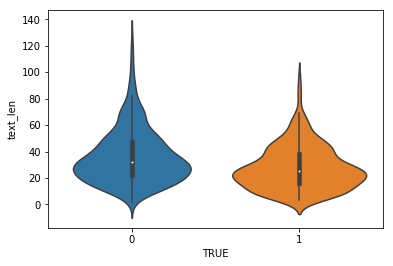

In [136]:
import seaborn as sns
%matplotlib inline

sns.violinplot(x='TRUE',y='text_len',data=sAI)

Violin plot shows us the distribution of each group .We can see the (true) AIs (orange plot) have a shorter tail than the non-AI sentences (blue plot). The sentences lengths are spreaded across fewer values (low variaty of lengths, in comparison to the non AIs), with center mass skewed 'down' to around 20- words. 
The non-AI plot has the density spreaded across a larger scale , with center mass tending more to the center ,around 30 words and the plot is a bit more spreaded around it (higher variance) 
The AI ones tend to be slightly shorter , with lower variance in length.  

### Most indicative word for AI 

#### step I:
Creating a Word dictionary, counting per word: [n_appearances, n_appearances_in_AI_txt]

In [137]:
word_count={}
for i in range(len(sAI.index)):
    is_ai=sAI['TRUE'].iloc[i]
    row_w={}
    for w in sAI['list_ns'].iloc[i]:
        row_w[w]=row_w.get(w,0)+1 #side dict per row to count word only once in the general dictionary
        if word_count.has_key(w) & row_w[w]==1 : #add the word appearance to the general dict, [appearance, ai_appearance]
            word_count[w][0]+=1
            word_count[w][1]+=is_ai
        elif not word_count.has_key(w): 
            word_count[w]=[1,is_ai]
        else: 
            continue
            
print word_count

{'incorrect.': [1, 0], 'gatekeeper': [1, 0], 'secondly': [1, 0], 'additionally': [1, 0], 'hats': [1, 0], 'child': [1, 0], 'connect.': [1, 1], 'sending.': [1, 1], 'hanging': [1, 0], 'appetite': [1, 0], 'saved': [1, 0], 'consider': [3, 1], 'up.': [7, 4], 'looking': [29, 10], 'feeding': [1, 0], 'swab': [1, 0], 'cadence?': [1, 0], 'segments': [2, 1], 'sorry': [3, 1], 'below.': [1, 0], 'updated': [3, 2], 'better.': [1, 0], 'every': [13, 3], 'updates': [1, 1], 'today.': [4, 2], 'bringing': [1, 0], 'salesforce.': [2, 1], 'four': [7, 2], "we'll": [70, 48], 'internally': [5, 2], 'progression': [1, 0], 'skills': [2, 0], 'enlist': [1, 0], 'companies': [10, 1], 'upload': [5, 1], '48': [1, 0], 'concise': [1, 1], 'phones': [1, 0], 'consistent': [1, 0], 'me.': [2, 1], 'scrapes': [1, 0], 'direct': [5, 1], 'pulse': [2, 1], 'horn': [1, 0], 'nail': [1, 0], 'likely': [2, 0], 'mna': [1, 0], 'machines': [1, 1], 'even': [24, 9], 'tiered': [1, 0], 'profitability': [1, 0], 'bonuses': [1, 0], 'report.': [3, 3],

#### step II
DataFrame containing all the words and their frequancies, in the overall sentences (column named 'app') and in the AI sentences (column named 'ai_app')

We want to know the probability that a sentence is AI, given a word. $P(A|B)$ , when B is an indicative word, should be high. 

$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)} = \frac{P(A\cap B)}{P(B)}$$ 
$P(A)$ : probability for an AI sentence = $\frac{\#(AI)}{n}$  
$P(B)$ : probability for the word  = $\frac{\#(word)}{n}$  
$P(A\cap B)$ : probability of an AI sentence, and the word appearing = $\frac{\#(AI\cap word)}{n}$  

i.e a word appearing in 500 sentences out of 800, in which 300 are AI sentences, will have :
$P(A|B) = \frac{\frac{300}{800}}{\frac{500}{800}} = \frac{300}{500} = \dfrac{\#(AI \cap word)}{\# word}$ 

Calculating the Score:
I'm not sure if what I'm doing here is 'legal' , but considering only the probability doesn't include the indicative words' frequancy in the overall population. her 'weight' as an indicative word. so i've decided to find the most indicative words with a combination of the $P(A|B)$ probability X $P(A\cap B)$

In [139]:
df=pd.DataFrame(word_count,index=('app','ai_app')).transpose()
AI_pop= len(sAI[sAI['TRUE']==1])
n=len(sAI)
p_A=float(AI_pop)/n
p_B= df['app']/n 

df['P(A&B)']=df['ai_app']/n 
df['P(B|A)']=df['ai_app']/AI_pop
df['P(A|B)']=df['ai_app']/df['app'] 
df['in_pop_rate']=df['app']/n  #no good, doesn't include AIness
df['score']= df['P(A|B)']*df['P(A&B)'] 
df.sort_values(by=['score'],ascending=False).head(10)

,app,ai_app,P(A&B),P(B|A),P(A|B),in_pop_rate,score
i'll,211,192,0.240903,0.533333,0.909953,0.264743,0.219211
send,223,173,0.217064,0.480556,0.775785,0.279799,0.168395
get,136,67,0.084065,0.186111,0.492647,0.170640,0.041414
we'll,70,48,0.060226,0.133333,0.685714,0.087829,0.041298
going,145,69,0.086575,0.191667,0.475862,0.181932,0.041198
i'm,82,47,0.058971,0.130556,0.573171,0.102886,0.033801
email,150,63,0.079046,0.175000,0.420000,0.188206,0.033199
back,77,41,0.051443,0.113889,0.532468,0.096612,0.027392
yeah,47,32,0.040151,0.088889,0.680851,0.058971,0.027337
know,224,68,0.085320,0.188889,0.303571,0.281054,0.025901
